In [1]:
library(ggplot2)
options(repr.plot.height = 4, repr.plot.width = 6)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Cargar los datos en un dataframe llamado: airbnb

In [2]:
airbnb <- read.csv('data//airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe

In [3]:
head(airbnb)

Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [4]:
newnames <- c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
colnames(airbnb) <- newnames

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [5]:
airbnb$MetrosCuadrados <- airbnb$PiesCuadrados * 0.092903

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [6]:
airbnb$CodigoPostal[airbnb$CodigoPostal == ""] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == "-"] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == "28"] <- NA
airbnb$CodigoPostal[!grepl("28", airbnb$CodigoPostal)] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == "2804"] <- "28004"
airbnb$CodigoPostal[airbnb$CodigoPostal == "2805"] <- "28005"
airbnb$CodigoPostal[airbnb$CodigoPostal == "2815"] <- "28015"
airbnb$CodigoPostal[airbnb$CodigoPostal == "280013"] <- "28013"
airbnb$CodigoPostal[airbnb$CodigoPostal == "28002\n28002"] <- "28002"
airbnb$CodigoPostal[airbnb$CodigoPostal == "28051\n28051"] <- "28051"
airbnb$CodigoPostal[airbnb$CodigoPostal == "Madrid 28004"] <- "28004"

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [7]:
levels(droplevels(airbnb$CodigoPostal))

[1] "28001" "28002" "28003" "28004" "28005" "28006" "28007" "28008" "28009"
[10] "28010" "28011" "28012" "28013" "28014" "28015" "28016" "28017" "28018"
[19] "28019" "28020" "28021" "28022" "28023" "28024" "28025" "28026" "28027"
[28] "28028" "28029" "28030" "28031" "28032" "28033" "28034" "28035" "28036"
[37] "28037" "28038" "28039" "28040" "28041" "28042" "28043" "28044" "28045"
[46] "28046" "28047" "28048" "28049" "28050" "28051" "28052" "28053" "28054"
[55] "28055" "28056" "28058" "28060" "28094" "28105" "28850"

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [8]:
head(sort(table(airbnb$CodigoPostal), decreasing = TRUE), 5)
tail(sort(table(droplevels(airbnb$CodigoPostal)), decreasing = TRUE), 5)


28012 28004 28005 28013 28014 
 2060  1796  1195  1020   630 


28058 28060 28094 28105 28850 
    1     1     1     1     1 

¿Cuales son los barrios que hay en el código postal 28012?

In [11]:
levels(droplevels(airbnb[airbnb$CodigoPostal == "28012", "Barrio"]))

[1] "Acacias"         "Arapiles"        "Atocha"          "Cortes"         
 [5] "Delicias"        "Embajadores"     "Goya"            "Palacio"        
 [9] "Palos de Moguer" "Sol"             "Universidad"

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [13]:
table(droplevels(airbnb[airbnb$CodigoPostal == "28012", "Barrio"]))


        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

Hay 125 barrios

In [14]:
str(airbnb$Barrio)
summary(airbnb$Barrio)

 Factor w/ 125 levels "Abrantes","Acacias",..: 115 115 115 115 115 115 115 115 115 115 ...


Embajadores                    Universidad 
                          1844                           1358 
                       Palacio                            Sol 
                          1083                            940 
                      Justicia                         Cortes 
                           785                            750 
                     Trafalgar                     ArgÃ¼elles 
                           315                            264 
               Palos de Moguer                           Goya 
                           262                            229 
              Puerta del Angel                     Guindalera 
                           199                            187 
                      Arapiles                      Recoletos 
                           182                            172 
                       Almagro                        Acacias 
                           155                            145 
                    Gaztambide                      PacÃ­fico 
                           142                            138 
                         Lista                       Delicias 
                           129                            126 
                Cuatro Caminos                        Chopera 
                           120                            112 
                         Ibiza                     Rios Rosas 
                           105                            104 
                   Prosperidad                     Castellana 
                            98                             97 
                    JerÃ³nimos                       Imperial 
                            90                             89 
                    San Isidro                    Castillejos 
                            85                             81 
                     San Diego                  Bellas Vistas 
                            80                             79 
                        Ventas                  Casa de Campo 
                            78                             75 
                  Vista Alegre                HispanoamÃ©rica 
                            74                             72 
              Fuente del Berro                     Berruguete 
                            68                             67 
                      Almenara                         Lucero 
                            62                             62 
                 Nueva EspaÃ±a                   Vallehermoso 
                            60                             60 
                      Comillas                       Numancia 
                            59                             58 
                       OpaÃ±el                 Ciudad JardÃ­n 
                            57                             55 
                  Valdefuentes                        Adelfas 
                            55                             51 
                 Valdeacederas                  Pinar del Rey 
                            48                             47 
                   ConcepciÃ³n                    Almendrales 
                            46                             45 
                        Aluche                        El Viso 
                            45                             45 
                      Quintana                       Simancas 
                            45                             45 
                      Valverde                       Canillas 
                            45                             42 
                  Pueblo Nuevo   Casco HistÃ³rico de Vallecas 
                            41                             40 
                   PeÃ±agrande                  Puerta Bonita 
                            39                             38 
                       Legazpi           Ciudad Universitaria 
                            37                    

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [12]:
head(summary(airbnb$Barrio), 5)

Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [13]:
summary(airbnb$TipoAlquiler)

Entire home/apt    Private room     Shared room 
           7903            5113             191

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
"Removed 1771 rows containing non-finite values (stat_boxplot)."

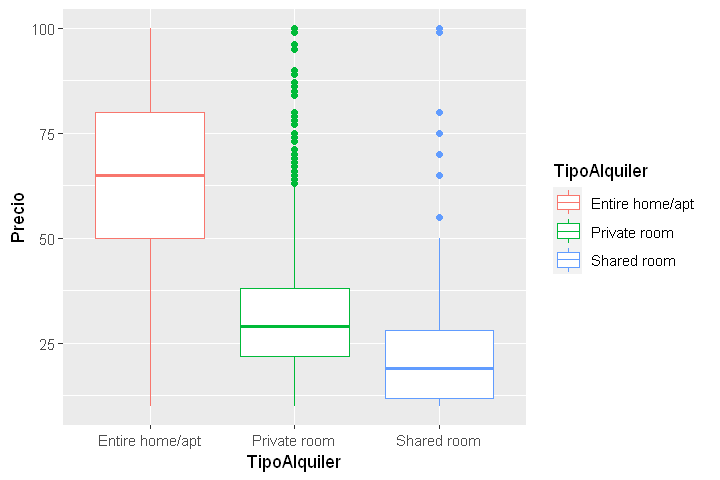

In [14]:
ggplot(data = airbnb, aes(x = TipoAlquiler, y = Precio, color = TipoAlquiler)) +
geom_boxplot() + ylim(10, 100)

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [15]:
for (v in levels(airbnb$TipoAlquiler)) {
    print(paste("Tipo de alquiler ", v, "media,",
                mean(airbnb$Precio[airbnb$TipoAlquiler == v], na.rm = TRUE)))
}

[1] "Tipo de alquiler  Entire home/apt media, 87.2966058763931"
[1] "Tipo de alquiler  Private room media, 34.255135981217"
[1] "Tipo de alquiler  Shared room media, 29.8534031413613"


In [15]:
for (v in levels(airbnb$TipoAlquiler)) {
    print(paste("Tipo de alquiler ", v, "pvalue,",
                shapiro.test(sample(airbnb$Precio[airbnb$TipoAlquiler == v], 191))$p.value)) 
}
kruskal.test(Precio ~ TipoAlquiler, data = airbnb)

[1] "Tipo de alquiler  Entire home/apt pvalue, 3.18438623057257e-14"
[1] "Tipo de alquiler  Private room pvalue, 8.12708539680416e-16"
[1] "Tipo de alquiler  Shared room pvalue, 4.51672121600842e-24"



	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


Como el test de Shapiro nos indica que los datos no siguen una distribución normal, en vez de hacer un ANOVA usamos el test de Kruskal-Wallis que nos dice que las medias sí son estadísticamente diferentes


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [19]:
airbnb_entire <- airbnb[airbnb$TipoAlquiler == "Entire home/apt", ]

head(airbnb_entire)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
8,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [18]:
head(summary(airbnb_entire$Barrio), 5)

Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [20]:
library(dplyr)
top5 <- aggregate(.~Barrio, data = airbnb_entire, mean, na.rm = TRUE)
top5 <- arrange(top5[c("Barrio", "Precio")], desc(Precio))
head(top5, 5)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Barrio,Precio
JerÃ³nimos,230
Castellana,190
Almagro,185
Guindalera,180
Pinar del Rey,155


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [21]:
top5_freq <- subset(airbnb_entire, Barrio == "JerÃ³nimos" | Barrio == "Castellana" | Barrio == "Almagro" |
      Barrio == "Guindalera" | Barrio == "Pinar del Rey")

In [22]:
freq <- unclass(summary(top5_freq$Barrio))
freq <- as.data.frame(freq)
freq <- cbind(Barrio = rownames(freq), freq)
rownames(freq) <- NULL

In [23]:
merge(head(top5, 5), freq, by = "Barrio")

Barrio,Precio,freq
Almagro,185,97
Castellana,190,73
Guindalera,180,82
JerÃ³nimos,230,62
Pinar del Rey,155,9


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [24]:
freq <- unclass(summary(airbnb_entire$Barrio))
freq <- as.data.frame(freq, check.names = FALSE, stringsAsFactors = TRUE)
freq <- cbind(Barrio = rownames(freq), freq)
rownames(freq) <- NULL

In [25]:
df <- merge(top5, freq, by = "Barrio")

In [26]:
df <- df[df$freq > 100, ]
head(arrange(df[df$freq > 100, ], desc(Precio)), 5)

Barrio,Precio,freq
Justicia,110.80000,534
Trafalgar,104.60000,223
Sol,97.54237,701
Cortes,91.46429,574
Goya,89.66667,142


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
"Removed 7 rows containing non-finite values (stat_density)."Warning message:
"Removed 7 rows containing non-finite values (stat_density)."

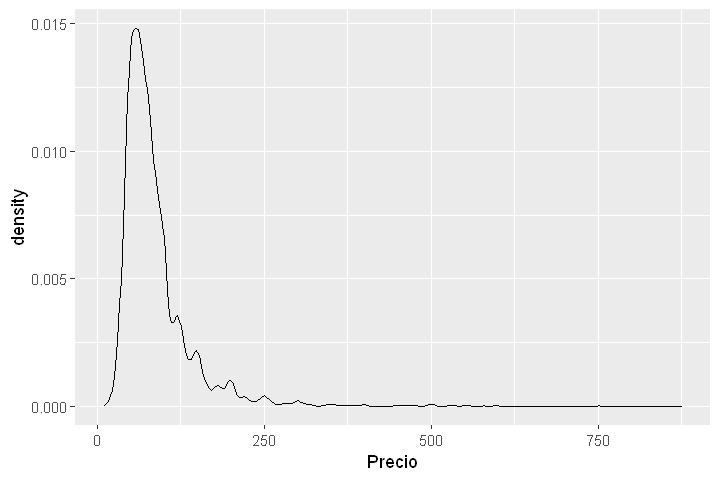

Warning message:
"Removed 7 rows containing non-finite values (stat_density)."

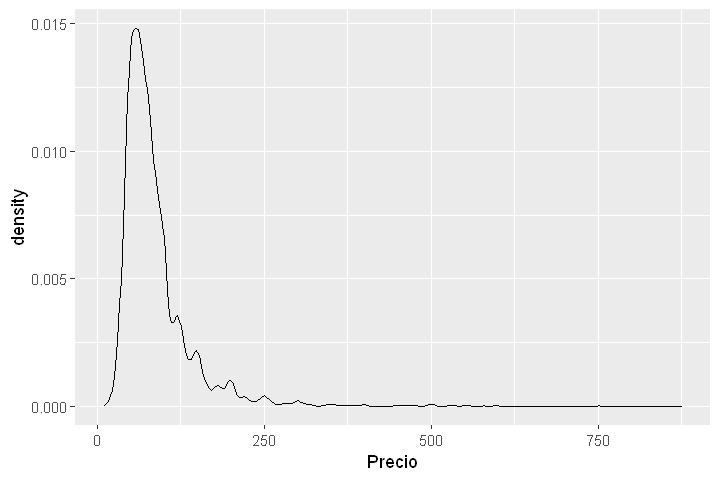

Warning message:
"Removed 7 rows containing non-finite values (stat_density)."

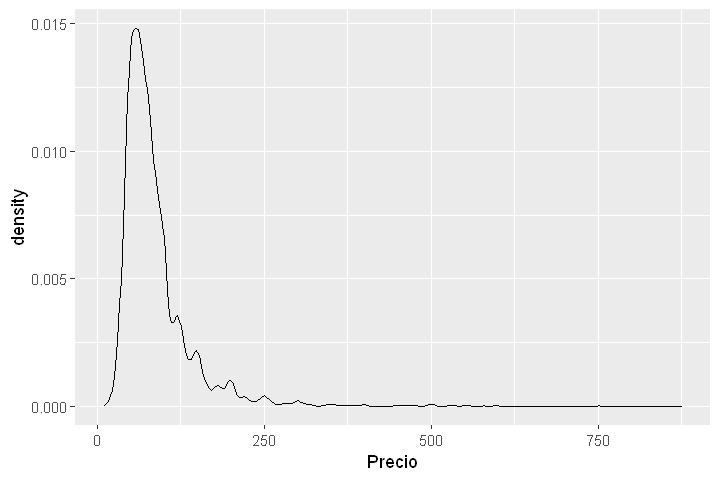

Warning message:
"Removed 7 rows containing non-finite values (stat_density)."

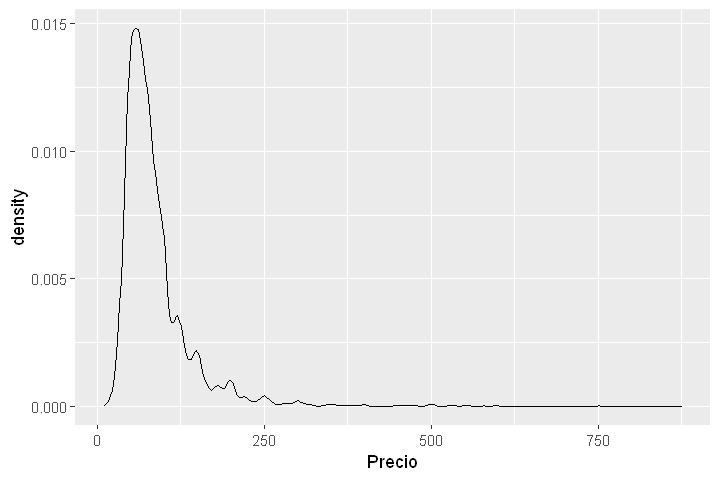

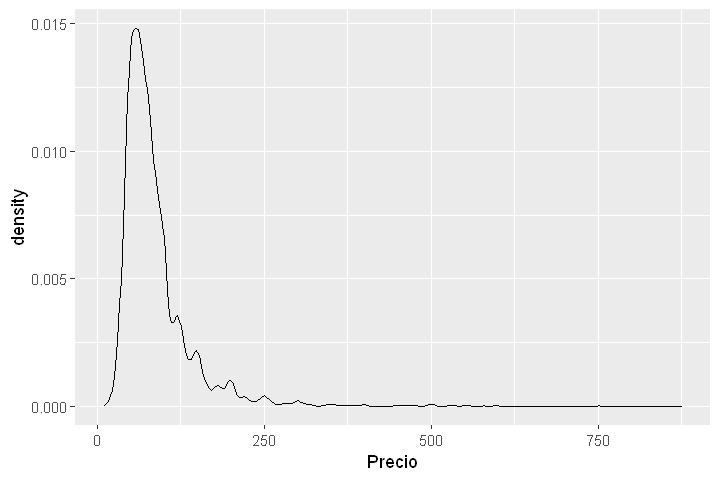

In [27]:
justicia = subset(airbnb_entire, Barrio = "Justicia")
trafalgar = subset(airbnb_entire, Barrio = "Trafalgar")
sol = subset(airbnb_entire, Barrio = "Sol")
cortes = subset(airbnb_entire, Barrio = "Cortes")
goya = subset(airbnb_entire, Barrio = "Goya")

ggplot(data = justicia, aes(x = Precio)) + geom_density()
ggplot(data = trafalgar, aes(x = Precio)) + geom_density()
ggplot(data = sol, aes(x = Precio)) + geom_density()
ggplot(data = cortes, aes(x = Precio)) + geom_density()
ggplot(data = goya, aes(x = Precio)) + geom_density()

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [28]:
top5_size <- subset(airbnb_entire, Barrio == "Justicia" | Barrio == "Trafalgar" | Barrio == "Sol" |
      Barrio == "Cortes" | Barrio == "Goya")
top5_size <- aggregate(.~Barrio, data = top5_size, mean, na.rm = TRUE)
top5_size <- top5_size[c("Barrio", "MetrosCuadrados")]
df_size <- merge(df, top5_size, by = "Barrio")
arrange(df_size[c("Barrio", "Precio", "freq", "MetrosCuadrados")], desc(Precio))

Barrio,Precio,freq,MetrosCuadrados
Justicia,110.80000,534,27.66651
Trafalgar,104.60000,223,41.02596
Sol,97.54237,701,44.35567
Cortes,91.46429,574,13.99186
Goya,89.66667,142,51.68504


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message:
"Removed 7546 rows containing non-finite values (stat_density)."Warning message:
"Removed 7546 rows containing non-finite values (stat_density)."

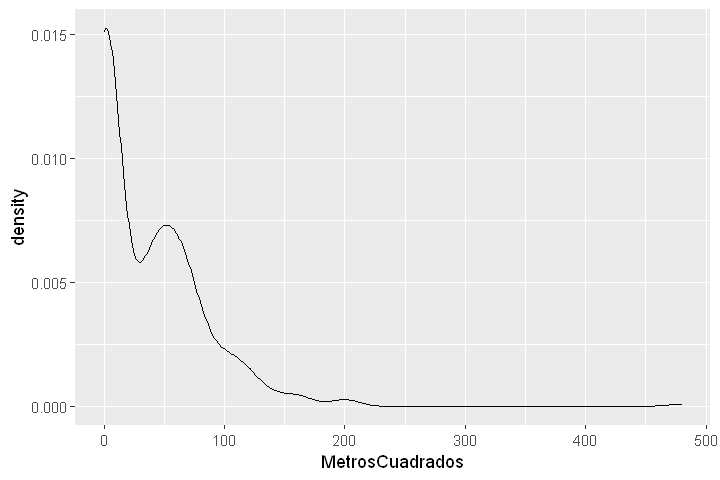

Warning message:
"Removed 7546 rows containing non-finite values (stat_density)."

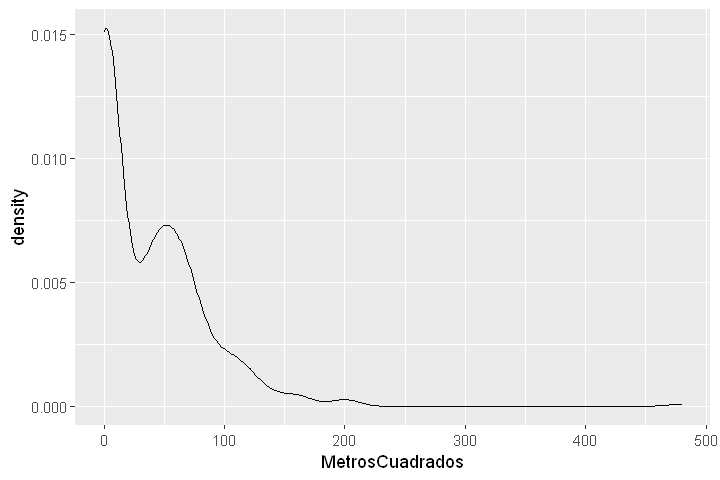

Warning message:
"Removed 7546 rows containing non-finite values (stat_density)."

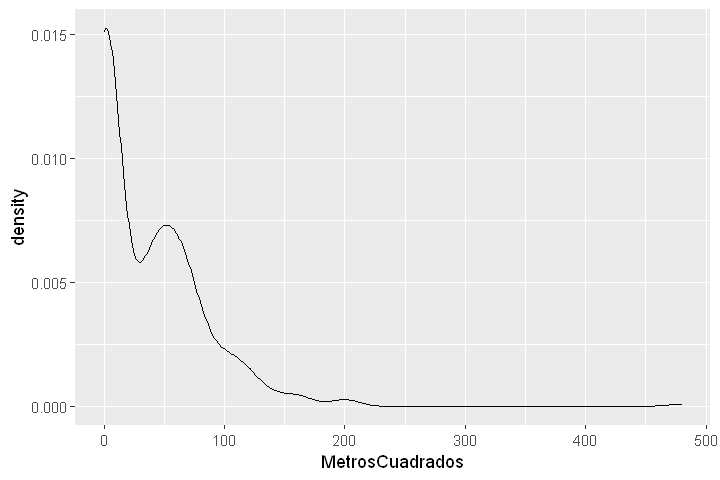

Warning message:
"Removed 7546 rows containing non-finite values (stat_density)."

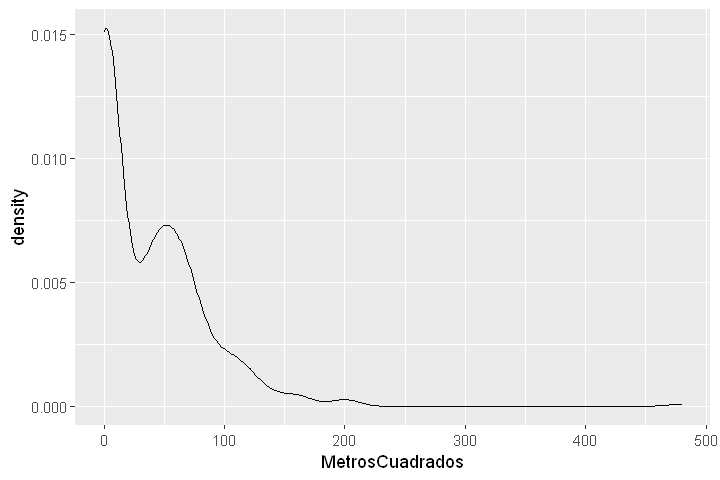

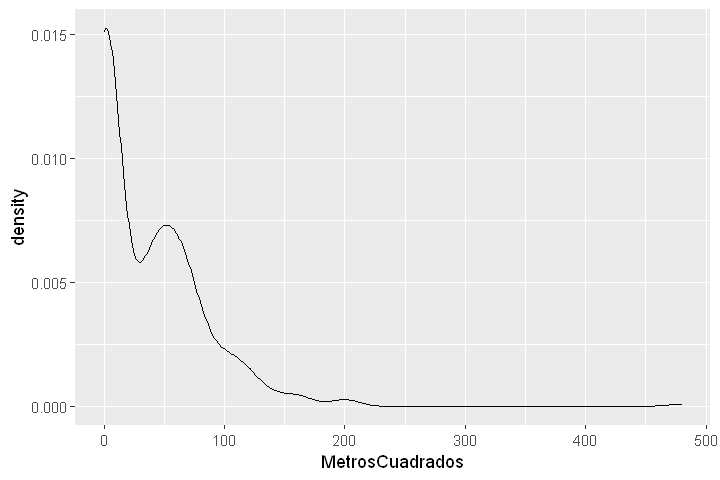

In [29]:
ggplot(data = justicia, aes(x = MetrosCuadrados)) + geom_density()
ggplot(data = trafalgar, aes(x = MetrosCuadrados)) + geom_density()
ggplot(data = sol, aes(x = MetrosCuadrados)) + geom_density()
ggplot(data = cortes, aes(x = MetrosCuadrados)) + geom_density()
ggplot(data = goya, aes(x = MetrosCuadrados)) + geom_density()

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [30]:
df <- subset(airbnb_entire, Barrio == "Justicia" | Barrio == "Trafalgar" | Barrio == "Sol" |
      Barrio == "Cortes" | Barrio == "Goya")

for (v in levels(droplevels(df$Barrio))) {
    print(paste("Barrio ", v, "pvalue,",
                shapiro.test(sample(df$MetrosCuadrados[df$Barrio == v], 142))$p.value)) 
}

kruskal.test(MetrosCuadrados ~ Barrio, data = df)

[1] "Barrio  Cortes pvalue, 0.000887629110191283"
[1] "Barrio  Goya pvalue, 0.519924091564745"
[1] "Barrio  Justicia pvalue, 0.00224907884340134"
[1] "Barrio  Sol pvalue, 0.00512707497781802"
[1] "Barrio  Trafalgar pvalue, 0.676717665882729"



	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 8.4005, df = 4, p-value = 0.07796


En este caso las medias no son estadísticamente diferentes

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [31]:
barrio_sol <- subset(airbnb_entire, Barrio == "Sol")
head(barrio_sol)
model <- lm(Precio ~ MetrosCuadrados + MaxOcupantes + NumDormitorios + NumBanyos, data = barrio_sol)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
15,28013,Sol,Apartment,Entire home/apt,4,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Suitable for events,Washer,Essentials,Hangers,Hair dryer,Iron",646,75,91,60.01534
16,28013,Sol,Condominium,Entire home/apt,6,1,2,3,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron",NA,130,100,NA
17,28013,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,100,97,NA
18,28012,Sol,Apartment,Entire home/apt,6,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,160,95,NA
19,28013,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Heating,Washer,Essentials,Hangers,Hair dryer,translation missing: en.hosting_amenity_50",NA,49,95,NA
21,28013,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Laptop friendly workspace",NA,70,88,NA


In [32]:
summary(model)


Call:
lm(formula = Precio ~ MetrosCuadrados + MaxOcupantes + NumDormitorios + 
    NumBanyos, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.852 -15.599  -4.021  10.042 108.406 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     42.28673   10.25650   4.123 0.000127 ***
MetrosCuadrados  0.29900    0.09997   2.991 0.004155 ** 
MaxOcupantes    -2.85045    2.60279  -1.095 0.278223    
NumDormitorios  22.75344    6.55828   3.469 0.001022 ** 
NumBanyos       15.70888   10.15721   1.547 0.127701    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32.42 on 55 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.6108,	Adjusted R-squared:  0.5825 
F-statistic: 21.58 on 4 and 55 DF,  p-value: 9.534e-11


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [34]:
cor(barrio_sol[c('Precio', 'MetrosCuadrados', 'MaxOcupantes', 'NumDormitorios', 'NumBanyos')],
   use = "na.or.complete")

,Precio,MetrosCuadrados,MaxOcupantes,NumDormitorios,NumBanyos
Precio,1.0000000,0.6381754,0.5269961,0.7160551,0.5975571
MetrosCuadrados,0.6381754,1.0000000,0.4286233,0.5684521,0.4820549
MaxOcupantes,0.5269961,0.4286233,1.0000000,0.7853809,0.7017290
NumDormitorios,0.7160551,0.5684521,0.7853809,1.0000000,0.6873719
NumBanyos,0.5975571,0.4820549,0.7017290,0.6873719,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


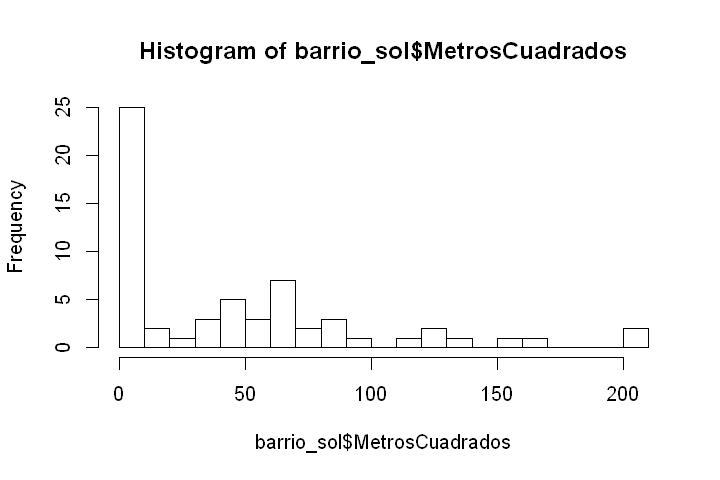

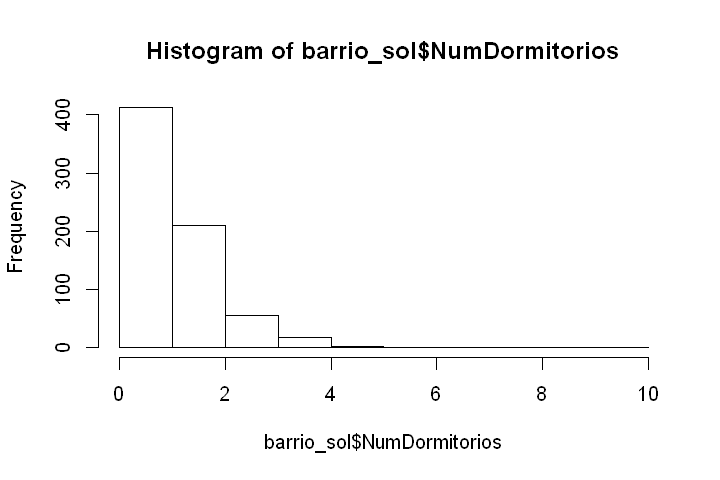

In [33]:
hist(barrio_sol$MetrosCuadrados, breaks = 20)
hist(barrio_sol$NumDormitorios, breaks = 10)

In [34]:
barrio_sol$MetrosCuadrados[barrio_sol$MetrosCuadrados < 20] <- NA
barrio_sol$NumDormitorios[barrio_sol$NumDormitorios == 0] <- NA

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [35]:
cor(barrio_sol[c('Precio', 'MetrosCuadrados', 'MaxOcupantes', 'NumDormitorios', 'NumBanyos')],
   use = "na.or.complete")

,Precio,MetrosCuadrados,MaxOcupantes,NumDormitorios,NumBanyos
Precio,1.0000000,0.7436684,0.7022165,0.8540959,0.6401045
MetrosCuadrados,0.7436684,1.0000000,0.6656265,0.8152787,0.5812796
MaxOcupantes,0.7022165,0.6656265,1.0000000,0.7751168,0.8595211
NumDormitorios,0.8540959,0.8152787,0.7751168,1.0000000,0.7260224
NumBanyos,0.6401045,0.5812796,0.8595211,0.7260224,1.0000000


In [86]:
model <- lm(Precio ~ MetrosCuadrados + MaxOcupantes + NumDormitorios + NumBanyos, data = barrio_sol,
            na.action = na.omit)
summary(model)


Call:
lm(formula = Precio ~ MetrosCuadrados + MaxOcupantes + NumDormitorios + 
    NumBanyos, data = barrio_sol, na.action = na.omit)

Residuals:
    Min      1Q  Median      3Q     Max 
-85.831 -15.395  -2.977  20.326  60.741 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      26.6525    15.7439   1.693  0.10342   
MetrosCuadrados   0.1707     0.2391   0.714  0.48227   
MaxOcupantes      2.3270     5.0557   0.460  0.64946   
NumDormitorios   33.3934    10.7180   3.116  0.00471 **
NumBanyos        -1.6202    16.3327  -0.099  0.92180   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 33.8 on 24 degrees of freedom
  (672 observations deleted due to missingness)
Multiple R-squared:  0.7394,	Adjusted R-squared:  0.696 
F-statistic: 17.03 on 4 and 24 DF,  p-value: 9.667e-07


Esto ocurre porque las variables están correlacionadas, ya que, por ejemplo, a mayor número de dormitorios, mayor úmero de metros cuadrados.

Sin embargo, las variables de una regresión no deben estar relacionadas.

In [84]:
model <- lm(Precio ~ NumDormitorios, data = barrio_sol, na.action = na.omit)
summary(model)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol, na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-250.482  -20.489   -4.489   15.511  253.513 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      40.490      3.378   11.99   <2e-16 ***
NumDormitorios   38.999      1.790   21.78   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.75 on 608 degrees of freedom
  (91 observations deleted due to missingness)
Multiple R-squared:  0.4384,	Adjusted R-squared:  0.4374 
F-statistic: 474.6 on 1 and 608 DF,  p-value: < 2.2e-16


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

El número de habitaciones

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [37]:
model <- lm(Precio ~ MetrosCuadrados, data = barrio_sol, na.action = na.omit)
summary(model)


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol, na.action = na.omit)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.388 -21.792  -0.115  10.642 121.693 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      29.5861    14.1142   2.096   0.0443 *  
MetrosCuadrados   0.9912     0.1520   6.521 2.81e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.83 on 31 degrees of freedom
  (668 observations deleted due to missingness)
Multiple R-squared:  0.5784,	Adjusted R-squared:  0.5648 
F-statistic: 42.53 on 1 and 31 DF,  p-value: 2.809e-07


Aumenta 0.9912€

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [38]:
model <- lm(Precio ~ NumDormitorios, data = barrio_sol, na.action = na.omit)
summary(model)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol, na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-250.482  -20.489   -4.489   15.511  253.513 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      40.490      3.378   11.99   <2e-16 ***
NumDormitorios   38.999      1.790   21.78   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.75 on 608 degrees of freedom
  (91 observations deleted due to missingness)
Multiple R-squared:  0.4384,	Adjusted R-squared:  0.4374 
F-statistic: 474.6 on 1 and 608 DF,  p-value: < 2.2e-16


Aumenta 38.999€

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

In [39]:
p = dim(na.omit(barrio_sol[barrio_sol$NumDormitorios == 3,]))[1] / dim(barrio_sol)[1] * 100
print(paste0("La probabilidad de encontrar un apartamente con 3 dormitorios en Sol es ", round(p, 2), "%"))

[1] "La probabilidad de encontrar un apartamente con 3 dormitorios en Sol es 0.29%"


In [40]:
n <- dim(barrio_sol)[1]
ns <- dim(na.omit(barrio_sol[barrio_sol$NumDormitorios == 3,]))[1]
pval <- 0.05

In [41]:
prop.test(ns, n , conf.level = 1 - pval)


	1-sample proportions test with continuity correction

data:  ns out of n, null probability 0.5
X-squared = 691.04, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.0004943298 0.0114379839
sample estimates:
          p 
0.002853067 


El margen de error de esa probabilidad está entre 0.0004943298 y 0.0114379839